In [1]:
#Import libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
#Load dataset

In [ ]:
df=pd.read_csv('heart_disease.csv')
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,FALSE,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,FALSE,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,FALSE,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,FALSE,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,TRUE,1.5,flat,fixed defect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,Male,asymptomatic,125,0,False,normal,120,FALSE,1.5,upsloping,fixed defect,4
904,62,Male,asymptomatic,166,170,False,st-t abnormality,120,TRUE,3.0,flat,fixed defect,4
905,56,Male,non-anginal,170,0,False,lv hypertrophy,123,TRUE,2.5,downsloping,reversable defect,4
906,56,Male,non-anginal,144,208,True,st-t abnormality,105,TURE,NaN,downsloping,fixed defect,4


In [5]:
df.describe()

,age,trestbps,chol,thalch,oldpeak,num
count,908.000000,908.000000,908.000000,908.000000,846.000000,908.000000
mean,53.791850,133.430617,201.484581,135.957048,0.891253,1.008811
std,9.158031,20.401608,112.097949,26.804929,1.093875,1.144436
min,29.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.750000,120.000000,176.750000,118.000000,0.000000,0.000000
50%,54.000000,130.000000,224.000000,138.000000,0.500000,1.000000
75%,60.000000,144.000000,270.000000,156.000000,1.500000,2.000000
max,77.000000,200.000000,603.000000,202.000000,6.200000,4.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [7]:
#check the missing values

In [8]:
missing_values =df.isnull().sum()
print(missing_values)

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64


In [9]:
#remove missing values

In [10]:
df=df.dropna()

In [11]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal', 'num'],
      dtype='object')

In [12]:
df.isnull().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalch,0
exang,0
oldpeak,0


In [13]:
#ecoding for categorical columns

In [14]:
from sklearn.preprocessing import LabelEncoder
categorical_columns = ['cp', 'restecg', 'exang', 'slope', 'thal']
encoder = LabelEncoder()
for column in categorical_columns:
    df[column] = encoder.fit_transform(df[column])


**Model Evalution**

In [15]:
#split dataset into train &test

In [16]:
x = df.iloc[:,:-1]
y = df['cp']

In [17]:
y

,cp
0,3
1,1
2,0
3,3
4,0
...,...
901,0
902,0
903,0
904,0


In [18]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [19]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [20]:
xtrain.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
136,51,Male,3,125,213,False,0,125,1,1.4,2,1
224,54,Female,1,120,221,False,1,138,0,1.0,2,2
409,39,Male,0,110,280,False,1,150,0,0.0,1,0
135,74,Female,1,120,269,False,0,121,1,0.2,2,1
642,62,Male,1,120,254,False,0,93,1,0.0,1,2


In [25]:
from sklearn.preprocessing import LabelEncoder

# Assuming 'sex' is the column with 'Male' and other string values
le = LabelEncoder()
xtrain['sex'] = le.fit_transform(xtrain['sex'])
# Apply the same transformation to xtest if it also has the 'sex' column
xtest['sex'] = le.transform(xtest['sex'])

dt = DecisionTreeClassifier(criterion='entropy')

dt.fit(xtrain,ytrain)
ypred = dt.predict(xtest)
ypred

array([2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 2, 1, 0, 3, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 3, 0,
       2, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 3, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0])

In [26]:
xtest.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal
729,52,1,2,122,0,False,1,110,1,2.0,0,2
377,52,1,1,140,100,False,1,138,1,0.0,0,0
186,61,0,1,140,298,True,1,120,1,0.0,1,2
486,40,1,0,152,223,False,1,181,0,0.0,2,2
745,62,1,0,135,297,False,1,130,1,1.0,1,0


In [27]:
ytest

,cp
729,2
377,1
186,1
486,0
745,0
...,...
590,1
469,0
458,0
566,0


In [28]:
#Decision Tree Classifier

In [29]:


# dt = DecisionTreeClassifier(criterion='entropy')

# dt.fit(xtrain,ytrain)
# ypred = dt.predict(xtest)
# ypred

In [30]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [31]:
dt.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**Model Evaluation**

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [33]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00         7

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [34]:
confusion_matrix(ytest,ypred)

array([[91,  0,  0,  0],
       [ 0, 35,  0,  0],
       [ 0,  0, 37,  0],
       [ 0,  0,  0,  7]])

In [35]:
dt.score(xtrain,ytrain)
dt.score(xtest,ytest)

1.0

In [36]:
print('Training accuracy: ', dt.score(xtrain,ytrain))
print('Testing Accuracy: ', np.round(dt.score(xtest,ytest),2))

Training accuracy:  1.0
Testing Accuracy:  1.0


In [37]:
x.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalch',
       'exang', 'oldpeak', 'slope', 'thal'],
      dtype='object')

In [38]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,0,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,0,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,0,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,0,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,1,1.5,1,0,0


In [39]:
df['cp'].unique()

array([3, 1, 0, 2])

In [40]:
df['cp'].nunique()

4

In [41]:
df.dtypes

,0
age,int64
sex,object
cp,int64
trestbps,int64
chol,int64
fbs,bool
restecg,int64
thalch,int64
exang,int64
oldpeak,float64


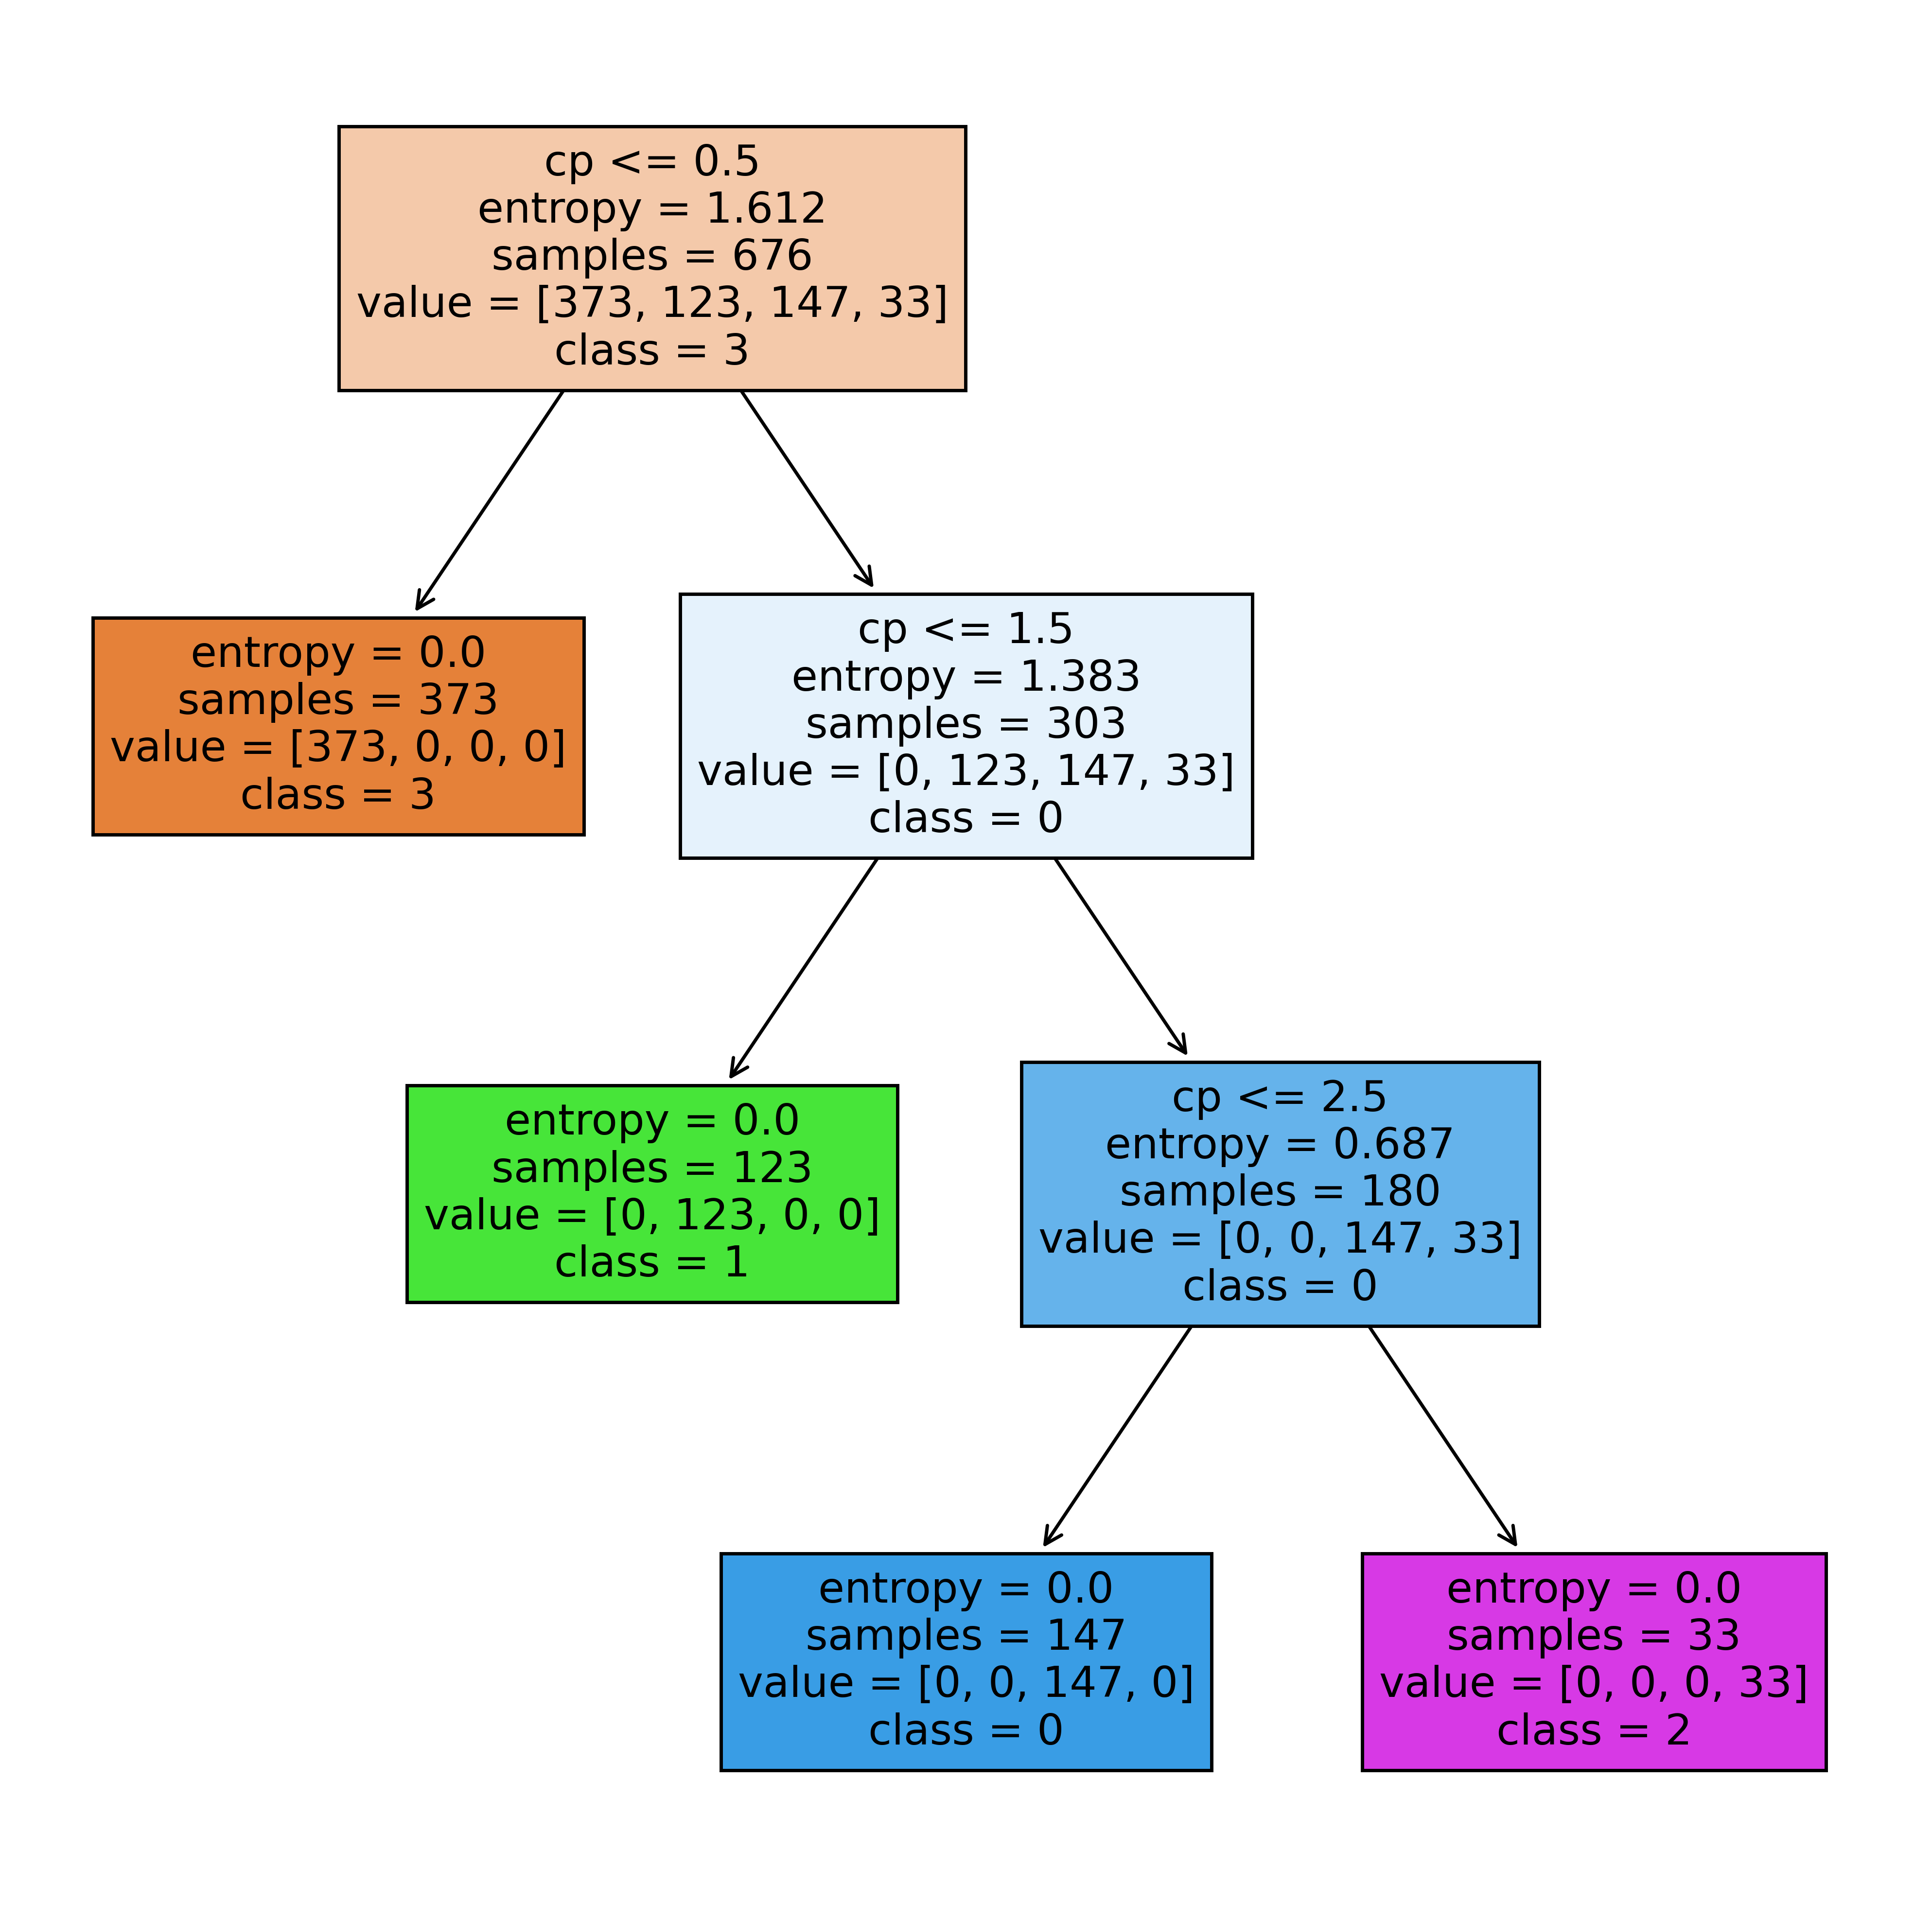

In [44]:
tree.plot_tree(dt,feature_names=x.columns, class_names=[str(name) for name in df['cp'].unique()], filled=True)
plt.show()

In [45]:
#return all information gain from all columns

In [46]:
dt.feature_importances_

array([0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

**CART**

In [47]:
#Classification

In [48]:
df.head(2)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,0,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,0,0.0,1,0,0


In [49]:
dtc = DecisionTreeClassifier(criterion='gini')

In [50]:
dtc.fit(xtrain,ytrain)
ypred = dtc.predict(xtest)
ypred

array([2, 1, 1, 0, 0, 2, 0, 0, 2, 0, 1, 2, 2, 0, 0, 0, 0, 2, 0, 1, 1, 1,
       0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 0, 2, 0, 0, 2, 0, 3, 0, 0, 0, 2, 0,
       0, 0, 2, 2, 0, 0, 2, 0, 0, 2, 0, 0, 1, 2, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 2, 2, 1, 0, 3, 1, 2, 0, 1, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 3, 1, 2, 2, 0, 2, 0, 0, 1, 0, 2, 2, 0, 2, 0, 3, 0,
       2, 0, 1, 3, 2, 2, 0, 0, 1, 1, 0, 0, 1, 1, 0, 3, 3, 2, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 2, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 0, 2, 1, 0, 0, 0, 0])

In [51]:
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        91
           1       1.00      1.00      1.00        35
           2       1.00      1.00      1.00        37
           3       1.00      1.00      1.00         7

    accuracy                           1.00       170
   macro avg       1.00      1.00      1.00       170
weighted avg       1.00      1.00      1.00       170



In [52]:
dtc.score(xtrain,ytrain), dtc.score(xtest,ytest)

(1.0, 1.0)

**Regression**

In [53]:
df.head(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,3,145,233,True,0,150,0,2.3,0,0,0
1,41,Male,1,135,203,False,1,132,0,0.0,1,0,0
2,57,Male,0,140,192,False,1,148,0,0.4,1,0,0
3,52,Male,3,118,186,False,0,190,0,0.0,1,0,0
4,57,Male,0,110,201,False,1,126,1,1.5,1,0,0


In [54]:
x = df.iloc[:,:3]
y = df['num']

In [55]:
x

,age,sex,cp
0,63,Male,3
1,41,Male,1
2,57,Male,0
3,52,Male,3
4,57,Male,0
...,...,...,...
901,51,Male,0
902,62,Male,0
903,53,Male,0
904,62,Male,0


In [56]:
y

,num
0,0
1,0
2,0
3,0
4,0
...,...
901,4
902,4
903,4
904,4


In [57]:
#Split dataset into tarining & testing

In [58]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.3, random_state=42)

In [59]:
from sklearn.tree import DecisionTreeRegressor

In [61]:
xtrain['sex'] = le.fit_transform(xtrain['sex'])
xtest['sex'] = le.transform(xtest['sex']) # Use the same encoder to transform the test set

# Now fit the DecisionTreeRegressor
dtr = DecisionTreeRegressor()
dtr.fit(xtrain,ytrain)
yp = dtr.predict(xtest)
print(yp)

[0.         2.         0.         0.         3.         0.
 1.44444444 0.         0.66666667 1.         2.07142857 1.
 0.         1.07142857 1.5        2.         0.         0.
 1.         1.5        1.2        0.66666667 2.07692308 1.5
 0.         0.         1.61538462 1.         2.07692308 0.
 0.         1.6        1.5        1.33333333 1.375      1.375
 1.6        2.07692308 1.         1.25       0.2        1.
 1.         1.         2.         0.         1.         0.5
 0.         0.         1.         1.         0.         0.5
 0.         1.         0.5        0.         2.         1.5
 1.07142857 1.45454545 1.         0.         0.         1.
 0.         1.90909091 0.         0.         1.90909091 1.25
 0.         0.         0.         1.45454545 1.90909091 1.5
 0.90909091 1.66666667 1.         1.44444444 2.         1.44444444
 1.22222222 1.         1.66666667 0.         0.6        1.5
 1.44444444 1.625      1.5        1.         0.         0.
 1.25       0.66666667 1.66666667 0.6

In [62]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(0.5260178879218944, 0.1444957327372045)

In [63]:
from sklearn.metrics import mean_squared_error

In [64]:
mse = mean_squared_error(ytest,yp)
import numpy as np
mse

1.1853685513540178

In [65]:
rmse = np.sqrt(mse)
rmse

1.0887463209370756

In [66]:
x.columns

Index(['age', 'sex', 'cp'], dtype='object')

In [67]:
plt.figure(figsize = (20,20),dpi = 500)
tree.plot_tree(dtr, feature_names=['age', 'cp', 'trestbps'], filled=True)
plt.show()